### Solar Energy EDA – Cross-Country Comparison
This notebook compares solar energy datasets for **Benin**, **Sierra Leone**, and **Togo** using statistical and visual analysis.


#### 1. Load Cleaned CSVs
Import cleaned CSV files for each country, attach a 'Country' label, and merge them into one DataFrame for comparison.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

benin_df = pd.read_csv('../data/benin-malanville_clean.csv')
sierra_df = pd.read_csv('../data/sierraleone-bumbuna_clean.csv')
togo_df = pd.read_csv('../data/togo-dapaong_qc_clean.csv')

# Add a column to identify each country's data
benin_df['country'] = 'Benin'
sierra_df['country'] = 'Sierra Leone'
togo_df['country'] = 'Togo'

# Combine them
df_all = pd.concat([benin_df, sierra_df, togo_df], ignore_index=True)

df_all.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,country
1576795,2022-10-24 23:56:00,0.0,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,Togo
1576796,2022-10-24 23:57:00,0.0,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,Togo
1576797,2022-10-24 23:58:00,0.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,Togo
1576798,2022-10-24 23:59:00,0.0,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,Togo
1576799,2022-10-25 00:00:00,0.0,0.0,0.0,0.0,0.0,25.4,52.3,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,Togo


### 2. Metric Comparison


#### 2.1 Boxplots
Visualize GHI, DNI, and DHI for all countries using boxplots to identify distribution, variance, and outliers.


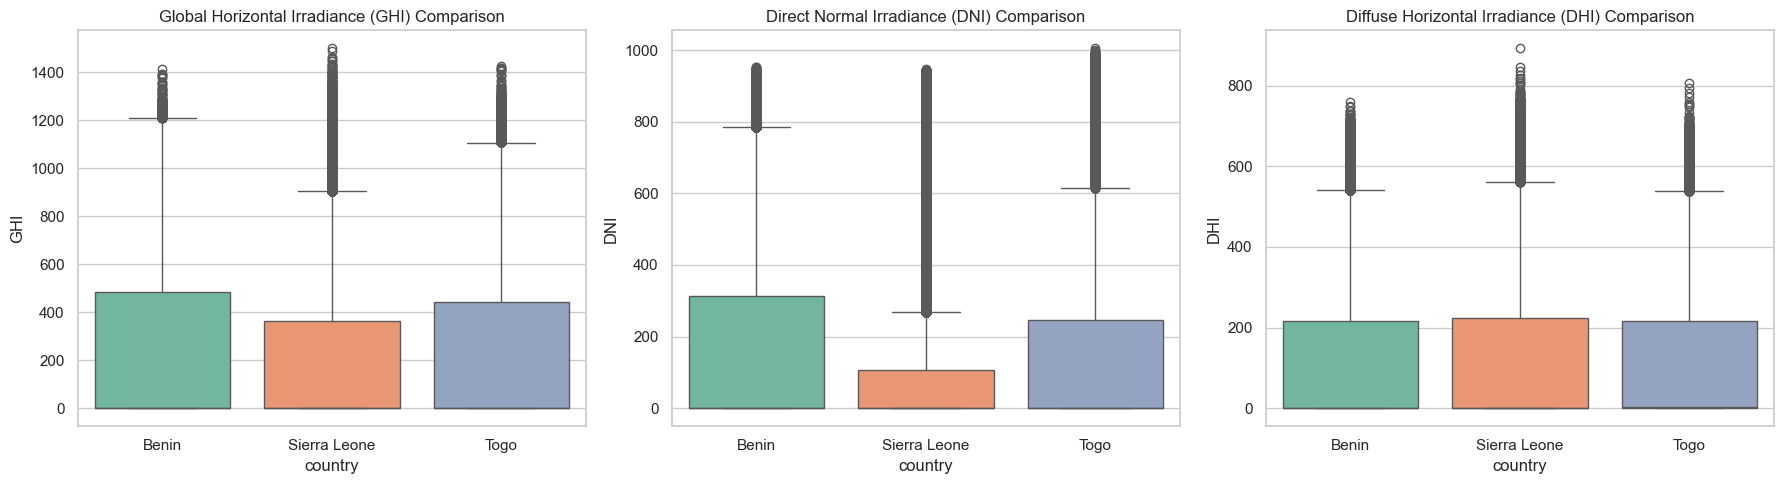

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# GHI boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x="country", y="GHI", hue="country", data=df_all, palette="Set2", legend=False)
plt.title("Global Horizontal Irradiance (GHI) Comparison")
plt.legend([],[], frameon=False)

# DNI boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x="country", y="DNI", hue="country", data=df_all, palette="Set2", legend=False)
plt.title("Direct Normal Irradiance (DNI) Comparison")
plt.legend([],[], frameon=False)  

# DHI boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x="country", y="DHI", hue="country", data=df_all, palette="Set2", legend=False)
plt.title("Diffuse Horizontal Irradiance (DHI) Comparison")
plt.legend([],[], frameon=False) 

plt.tight_layout()
plt.show()

#### 2.2 Summary Table
We generate a table comparing **mean**, **median**, and **standard deviation** for each solar metric across countries.


In [27]:
try:
    # Metrics to summarize
    metrics = ['GHI', 'DNI', 'DHI']

    # Summary table using groupby and aggregation
    summary_stats = combined_df.groupby('Country')[metrics].agg(['mean', 'median', 'std'])

    # Flatten column names
    summary_stats.columns = ['_'.join(col).capitalize() for col in summary_stats.columns]
    summary_stats.reset_index(inplace=True)

    # Display the summary
    display(summary_stats)
    print("Summary statistics table generated successfully.")

except Exception as e:
    print(f"Failed to compute summary statistics: {e}")


,Country,Ghi_mean,Ghi_median,Ghi_std,Dni_mean,Dni_median,Dni_std,Dhi_mean,Dhi_median,Dhi_std
0,Benin,241.958821,1.8,330.101787,167.441866,0.0,261.547532,116.993033,1.6,157.463619
1,Sierra Leone,204.406778,0.3,296.787520,116.523731,0.0,218.573992,116.273677,0.0,157.020868
2,Togo,231.718786,2.1,321.691953,151.258469,0.0,250.956962,116.444352,2.5,156.520714


Summary statistics table generated successfully.


#### 3. Statistical Testing
We apply one-way ANOVA (or Kruskal–Wallis) to GHI values across the three countries to test if the differences are statistically significant.


#### 4. Key Observations
Here we summarize important findings and trends from the analysis in bullet points.


#### 5. Visual Summary – Bar Chart of Avg GHI
We visualize average GHI per country using a simple bar chart.
